In this technique this model predicts a specific water is save to drink or not using some parameters like ph value, hardness, solids, shloramines, sulfate etc.--


In [1]:
# import all the required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# loading the data set
df = pd.read_csv("water_potability.csv")
# display the top 5 rows of dataset
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


## Exploratory Data Analysis

In [2]:
# check the shape of the data set (3276 rows and 10 columns)
df.shape

(3276, 10)

In [3]:
# check the null value ( 3 features ph, sulfate, trihalomethaness contains the null value)
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [5]:
df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [6]:
# fill the null value using the mean value
df.fillna(df.mean(), inplace=True)
# then againg check it contains the null value or not
df.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [7]:
# display the potability and check the value counts
# how much 0 and how much 1
df.Potability.value_counts()

0    1998
1    1278
Name: Potability, dtype: int64

<AxesSubplot:ylabel='Potability'>

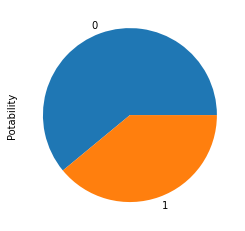

In [8]:
df.Potability.value_counts().plot(kind ='pie')

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


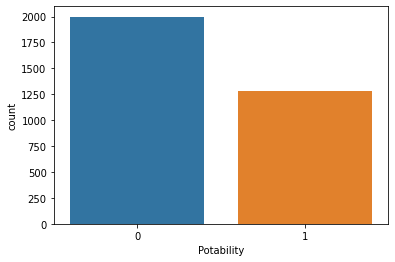

In [9]:
# visibility the potability using the count plot
# using the countplot function of seaborn
sns.countplot(df['Potability'])
plt.show()

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


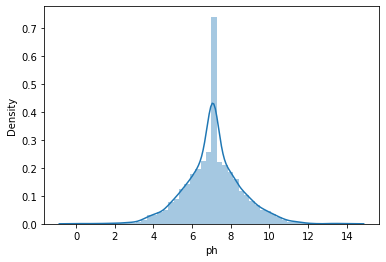

In [10]:
sns.distplot(df['ph'])
plt.show()

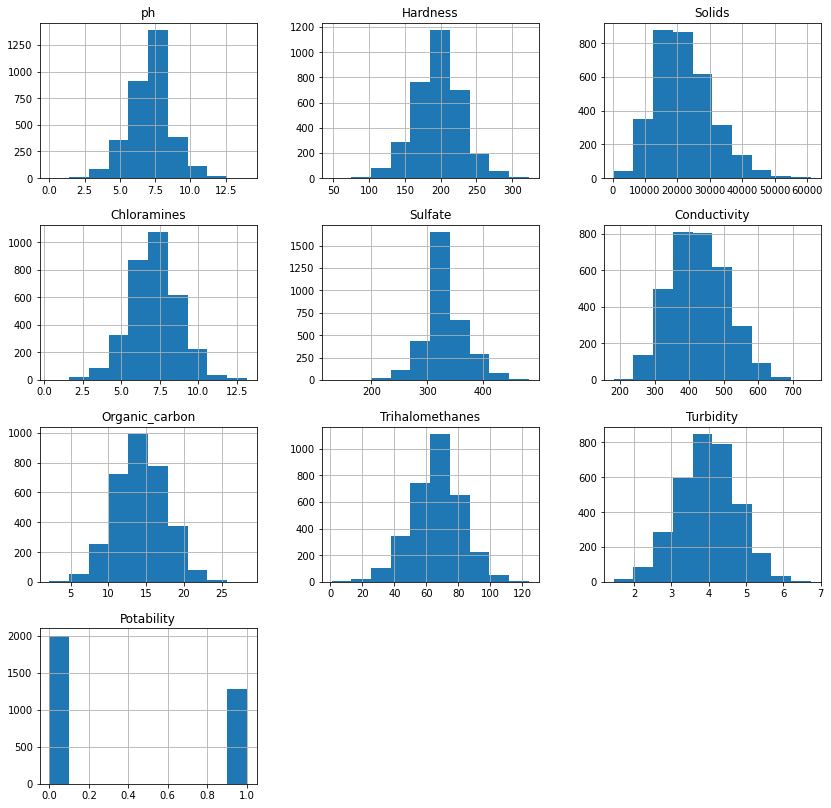

In [11]:
df.hist(figsize=(14,14))
plt.show()

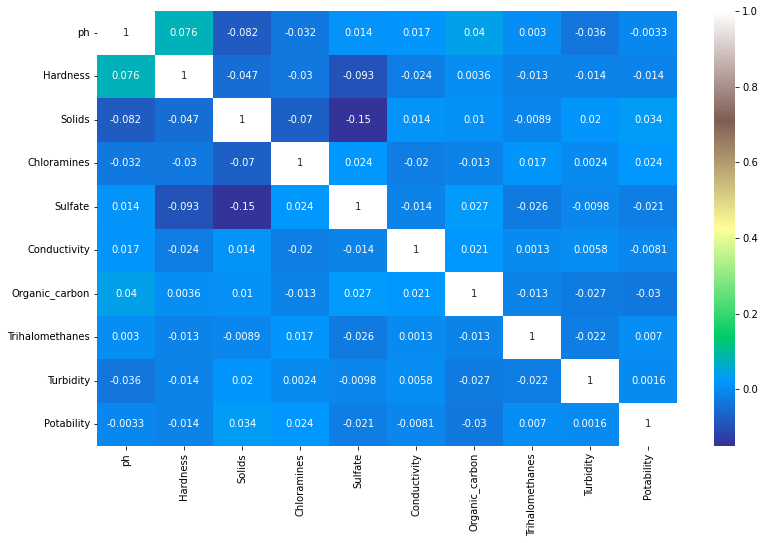

In [12]:
# visualization of corelation of all the features
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()
# but there is no corelation among any feature

<AxesSubplot:>

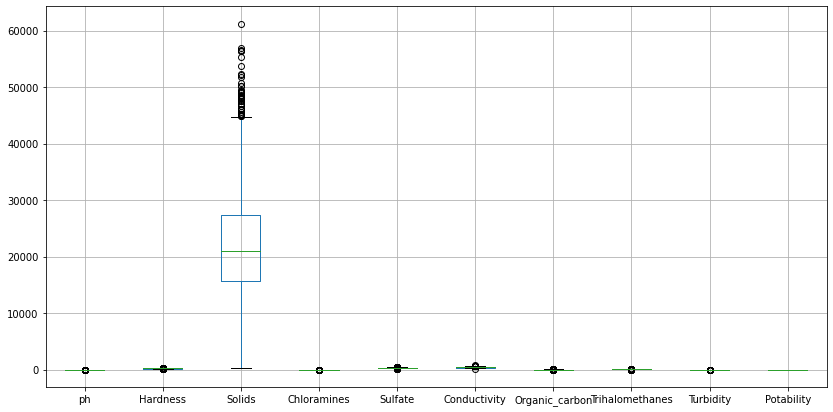

In [13]:
# the outliers using box plot
df.boxplot(figsize=(14, 7))

In [14]:
X = df.drop("Potability", axis=1)
Y = df['Potability']

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=101, shuffle=True)

# Train Decision Tree Classifier and Check Accuracy

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = DecisionTreeClassifier(criterion='gini', min_samples_split=10, splitter='best')
df.fit(X_train, Y_train)

DecisionTreeClassifier(min_samples_split=10)

In [17]:
prediction = df.predict(X_test)
print(f'Accuracy Score = {accuracy_score(Y_test,prediction)*100}')

print(f'Confusion Matrix = \n {confusion_matrix(Y_test,prediction)}')
print(f"Classification Report = \n {classification_report(Y_test, prediction)}")

Accuracy Score = 59.756097560975604
Confusion Matrix = 
 [[278 124]
 [140 114]]
Classification Report = 
               precision    recall  f1-score   support

           0       0.67      0.69      0.68       402
           1       0.48      0.45      0.46       254

    accuracy                           0.60       656
   macro avg       0.57      0.57      0.57       656
weighted avg       0.59      0.60      0.59       656



In [18]:
res = df.predict([[5.735724, 158.318745, 25363.016594, 7.728601, 377.543291, 568.304671, 13.626624, 75.952337, 4.732954]])[0]
res

C:\Users\HP\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


1

# Apply Hyper Parameter Tuning

In [19]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

model = DecisionTreeClassifier()
criterion = ['gini', 'entropy']
splitter = ['best', 'random']
min_samples_split = [2,4,6,8,10,12,14]

grid = dict(splitter=splitter, criterion=criterion, min_samples_split=min_samples_split)
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search_dt = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy', error_score=0)
grid_search_dt.fit(X_train, Y_train)

GridSearchCV(cv=RepeatedKFold(n_repeats=3, n_splits=10, random_state=1),
             error_score=0, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_split': [2, 4, 6, 8, 10, 12, 14],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [20]:
print(f"Best: {grid_search_dt.best_score_:.3f} using {grid_search_dt.best_params_}")
means = grid_search_dt.cv_results_["mean_test_score"]
stds = grid_search_dt.cv_results_["std_test_score"]
params = grid_search_dt.cv_results_["params"]

for mean, stdev, param in zip(means, stds, params):
    print(f"{mean:.3f} ({stdev:.3f}) with: {param}")

print("testing_score:", grid_search_dt.score(X_train, Y_train)*100)
print("Tesing Score:", grid_search_dt.score(X_test, Y_test)*100)

Best: 0.596 using {'criterion': 'gini', 'min_samples_split': 14, 'splitter': 'random'}
0.580 (0.027) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'best'}
0.569 (0.033) with: {'criterion': 'gini', 'min_samples_split': 2, 'splitter': 'random'}
0.583 (0.031) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'best'}
0.578 (0.027) with: {'criterion': 'gini', 'min_samples_split': 4, 'splitter': 'random'}
0.577 (0.024) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'best'}
0.590 (0.027) with: {'criterion': 'gini', 'min_samples_split': 6, 'splitter': 'random'}
0.581 (0.030) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'best'}
0.588 (0.026) with: {'criterion': 'gini', 'min_samples_split': 8, 'splitter': 'random'}
0.581 (0.031) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'best'}
0.584 (0.037) with: {'criterion': 'gini', 'min_samples_split': 10, 'splitter': 'random'}
0.582 (0.031) with: {'criterion': 'gini',